# Dimensionality Reduction

In [36]:
# Importing necessary packages
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the data
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")
df = pd.read_csv(f"{path}/Obesity prediction.csv")

## Understanding the df

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

## Visualization

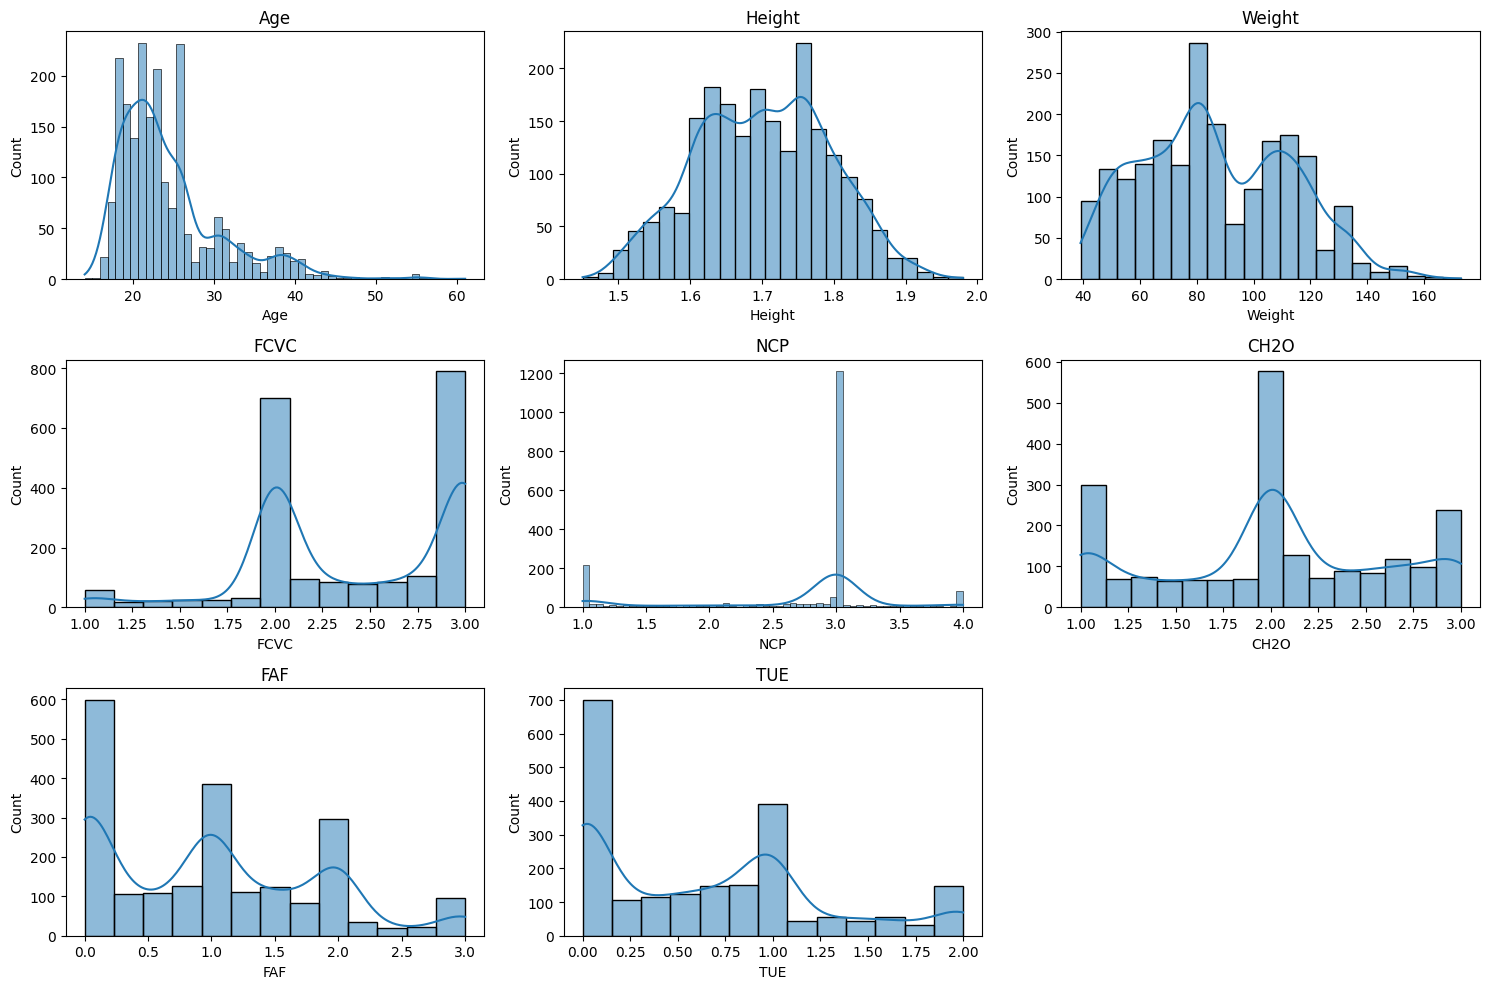

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


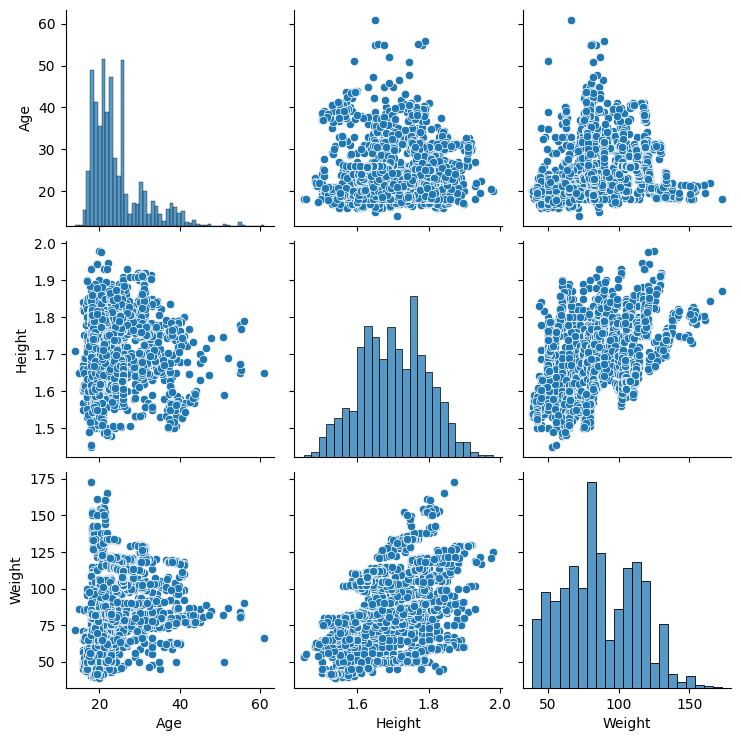

In [ ]:
continuous_cols = ['Age', 'Height', 'Weight']

sns.pairplot(df[continuous_cols])
plt.show()

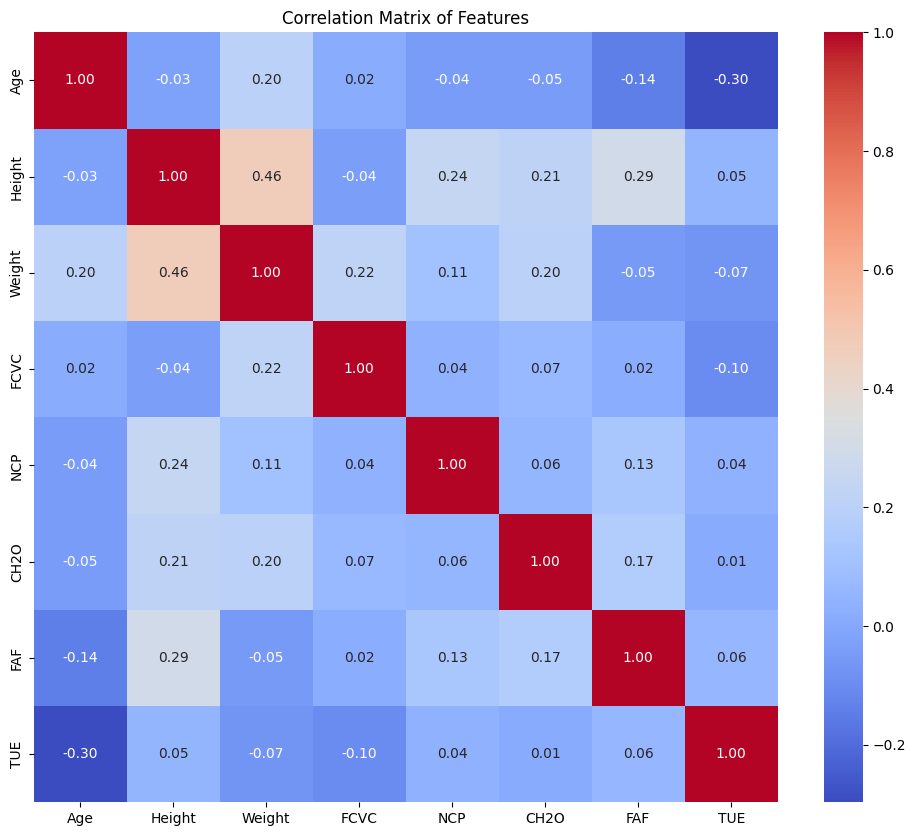

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Pre-Proccessing

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
# Separate features (X) and target (y)
X = df.drop('Obesity', axis=1)
y = df['Obesity']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

In [30]:
# Encode categorical features
for col in categorical_cols:
    if len(X[col].unique()) == 2:
        X[col] = LabelEncoder().fit_transform(X[col])
    else:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        encoded_features = encoder.fit_transform(X[[col]])
        encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out([col]))
        X = pd.concat([X, encoded_df], axis=1).drop(col, axis=1)

In [31]:
# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [32]:
X[:5]

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Encode target variable
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

## Training the model

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = rf_classifier.predict(X_test)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9479905437352246
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.86      0.92      0.89        62
           2       0.99      0.94      0.96        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.88      0.87        56
           6       0.96      0.94      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



## PCA

In [41]:
# Defining PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [42]:
rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_pca = rf_classifier_pca.predict(X_test_pca)

In [44]:
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca}")
print(classification_report(y_test, y_pred_pca))

Accuracy with PCA: 0.8794326241134752
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.75      0.71      0.73        62
           2       0.94      0.87      0.91        78
           3       0.88      0.98      0.93        58
           4       1.00      1.00      1.00        63
           5       0.87      0.80      0.83        56
           6       0.77      0.82      0.80        50

    accuracy                           0.88       423
   macro avg       0.87      0.88      0.88       423
weighted avg       0.88      0.88      0.88       423



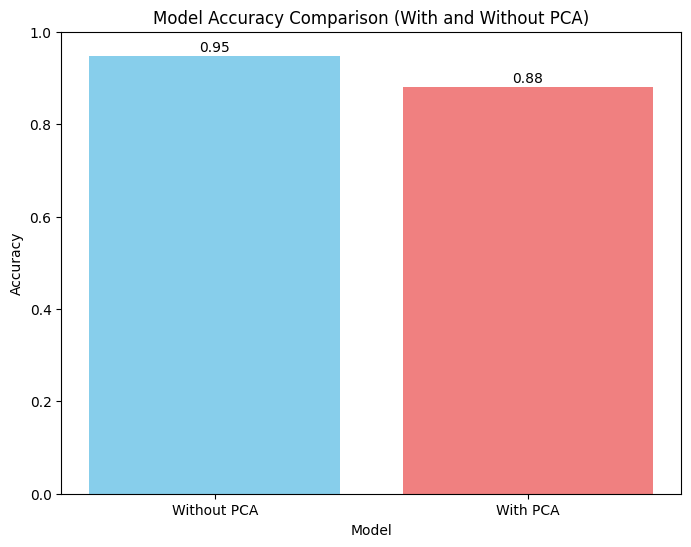

In [46]:
models = ['Without PCA', 'With PCA']
accuracies = [accuracy, accuracy_pca]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Model Accuracy Comparison (With and Without PCA)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0,1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()
